In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [5]:
from sklearn.datasets import fetch_openml

# Load dataset manually
df = pd.read_csv("IMDB Dataset.csv")  # Ensure you have the dataset downloaded in your directory

df.columns = ['review', 'sentiment']
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [6]:
# Data Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

df['cleaned_review'] = df['review'].apply(preprocess_text)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

In [8]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [9]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [10]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [11]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

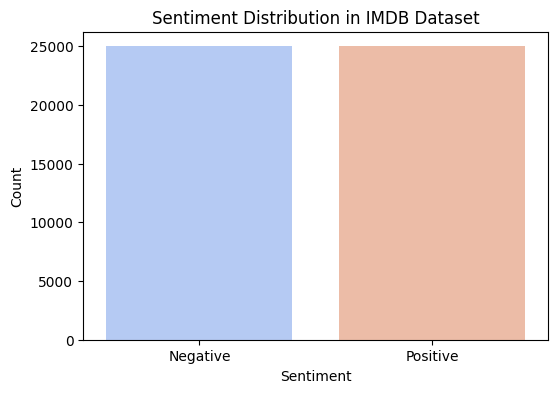

In [14]:
# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='coolwarm', legend=False)
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in IMDB Dataset")
plt.show()


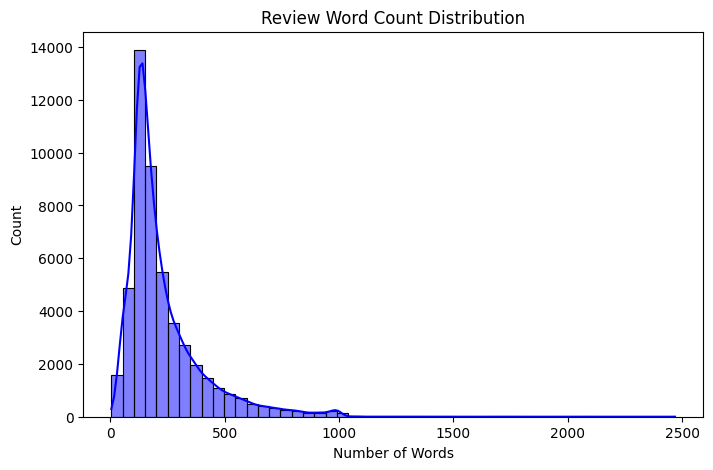

In [15]:
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=50, kde=True, color='blue')
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.title("Review Word Count Distribution")
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix


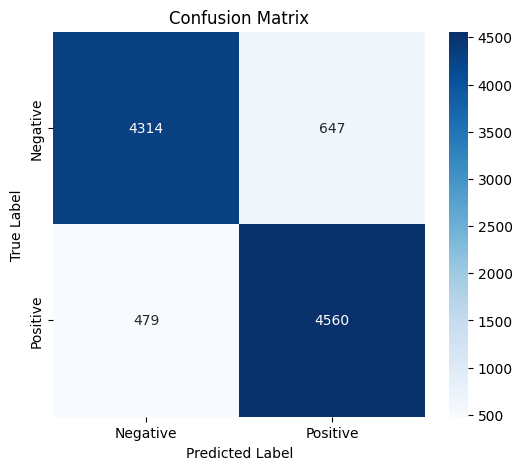

In [18]:
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

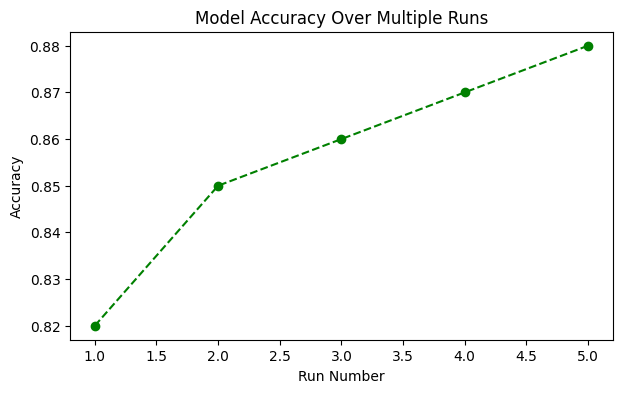

In [19]:
accuracies = [0.82, 0.85, 0.86, 0.87, 0.88]  # Replace with actual accuracy scores from multiple runs
epochs = range(1, len(accuracies) + 1)

plt.figure(figsize=(7,4))
plt.plot(epochs, accuracies, marker='o', linestyle='--', color='green')
plt.xlabel("Run Number")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Multiple Runs")
plt.show()